## Setting up

In [43]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
import numpy as np
from tqdm import tqdm
from selenium import webdriver
import chromedriver_binary
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

In [44]:
path = chromedriver_binary.chromedriver_filename
link = 'https://www.forbes.com/billionaires/'

In [45]:
browser = webdriver.Chrome(path)

<ipython-input-45-8996e59d0d1c>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(path)


In [46]:
browser.get(link)

In [47]:
df = pd.read_csv("Scrap_Multiple_Pages.csv")

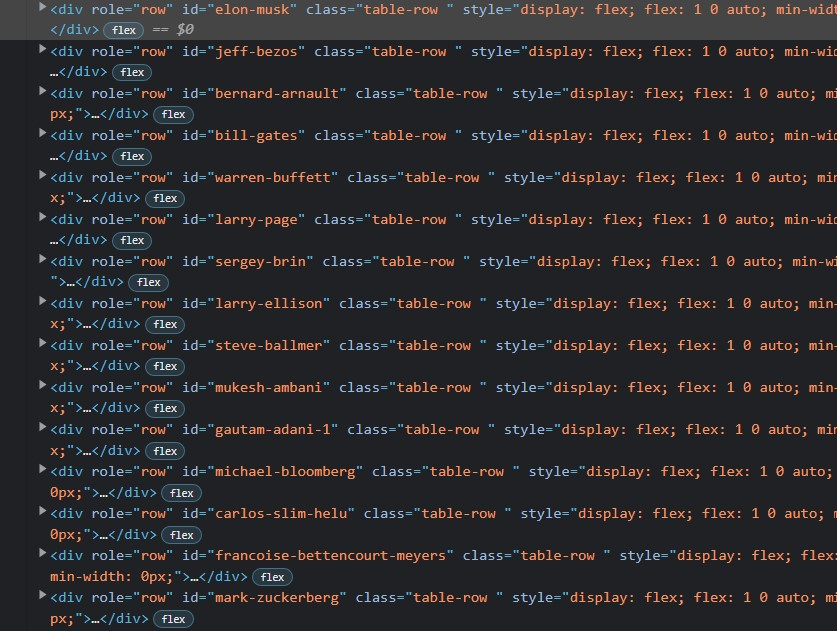

* To click every persons block we have to target their names E.g Elon Musk should become "elon-musk"

` Some Inferences `
* Double Quotes are necessary
* '& family' should be removed 
* whitespaces should be changed with - and should be only present bw first and last name



In [48]:
df2 = df['Person']
df1 = pd.DataFrame(df2)
df1

,Person
0,Elon Musk
1,Jeff Bezos
2,Bernard Arnault & family
3,Bill Gates
4,Warren Buffett
...,...
2663,Zhang Yuqiang
2664,Zhou Ruxin
2665,Wen Zhou & family
2666,Zhou Yifeng & family


In [49]:
df1.update('"' + df1[['Person']].astype(str) + '"')
df1

,Person
0,"""Elon Musk """
1,"""Jeff Bezos """
2,"""Bernard Arnault & family """
3,"""Bill Gates """
4,"""Warren Buffett """
...,...
2663,"""Zhang Yuqiang """
2664,"""Zhou Ruxin """
2665,"""Wen Zhou & family """
2666,"""Zhou Yifeng & family """


In [50]:
df2 = df1['Person']
df2

0                      "Elon Musk "
1                     "Jeff Bezos "
2       "Bernard Arnault & family "
3                     "Bill Gates "
4                 "Warren Buffett "
                   ...             
2663               "Zhang Yuqiang "
2664                  "Zhou Ruxin "
2665           "Wen Zhou & family "
2666        "Zhou Yifeng & family "
2667     "Zhuang Kuilong & family "
Name: Person, Length: 2668, dtype: object

In [51]:
name = []
for i in range(len(df2)):
    try:
        temp = df2[i].replace(' & family','').strip(' ').replace(' ','-').lower()
    except:
        None
    name.append([temp])
name


[['"elon-musk-"'],
 ['"jeff-bezos-"'],
 ['"bernard-arnault-"'],
 ['"bill-gates-"'],
 ['"warren-buffett-"'],
 ['"larry-page-"'],
 ['"sergey-brin-"'],
 ['"larry-ellison-"'],
 ['"steve-ballmer-"'],
 ['"mukesh-ambani-"'],
 ['"gautam-adani-"'],
 ['"michael-bloomberg-"'],
 ['"carlos-slim-helu-"'],
 ['"francoise-bettencourt-meyers-"'],
 ['"mark-zuckerberg-"'],
 ['"jim-walton-"'],
 ['"zhong-shanshan-"'],
 ['"alice-walton-"'],
 ['"rob-walton-"'],
 ['"changpeng-zhao-"'],
 ['"charles-koch-"'],
 ['"julia-koch-"'],
 ['"amancio-ortega-"'],
 ['"michael-dell-"'],
 ['"zhang-yiming-"'],
 ['"david-thomson-"'],
 ['"phil-knight-"'],
 ['"dieter-schwarz-"'],
 ['"robin-zeng-"'],
 ['"mackenzie-scott-"'],
 ['"rodolphe-saadé-"'],
 ['"françois-pinault-"'],
 ['"klaus-michael-kuehne-"'],
 ['"ma-huateng-"'],
 ['"beate-heister-&-karl-albrecht-jr.-"'],
 ['"giovanni-ferrero-"'],
 ['"li-ka-shing-"'],
 ['"stephen-schwarzman-"'],
 ['"lee-shau-kee-"'],
 ['"len-blavatnik-"'],
 ['"jacqueline-mars-"'],
 ['"john-mars-"'],
 ['"

In [52]:
name = pd.DataFrame(name,columns=['Person'])
df3 = name['Person']

In [53]:
df4 = []
for i in range(len(df3)):
    try:
        x = df3[i].replace('-"','"')
    except:
        None
    df4.append([x])

In [54]:
df_final = pd.DataFrame(df4,columns=['Name'])

In [55]:
df_final

,Name
0,"""elon-musk"""
1,"""jeff-bezos"""
2,"""bernard-arnault"""
3,"""bill-gates"""
4,"""warren-buffett"""
...,...
2663,"""zhang-yuqiang"""
2664,"""zhou-ruxin"""
2665,"""wen-zhou"""
2666,"""zhou-yifeng"""


## Click

In [56]:
df_final_1 = df_final['Name']

In [ ]:
d = []
for page in tqdm(range(0,14)):
    browser.find_element(By.XPATH,"//button[@aria-label='go to page "+ str(page) + "']").click()
    sleep(5)
    list1 = [[0,200],[200,400],[400,600],[600,800],[1000,1200],[1200,1400],[1400,1600],[1600,1800],[1800,2000],[2000,2200],[2200,2400],[2400,2600],[2600,2668]]
    for i in (range(list1[page][0],list1[page][1])):
        try:
            browser.find_element(By.XPATH,"//div[@id=" + str(df_final_1[i]) + "]").click()
            sleep(5)
            soup  = BeautifulSoup(browser.page_source,'html.parser')
            
            try:
                quote    = soup.find('div',class_='person-quote').text
            except:
                quote    = np.nan
            try:
                img      = soup.find('div',class_='avatar').img.get("src")
            except:
                img      = np.nan
                
            try:
                industry = soup.find('div',class_='bio').text
            except:
                industry = np.nan
            try:
                profile  = soup.find('a',class_='bio-button').get("href")
            except:
                profile  = np.nan
            
            d.append([quote,img,industry,profile]) 
        except:
            soup  = BeautifulSoup(browser.page_source,'html.parser')
            
            try:
                quote    = soup.find('div',class_='person-quote').text
            except:
                quote    = np.nan
            try:
                img      = soup.find('div',class_='avatar').img.get("src")
            except:
                img      = np.nan
                
            try:
                industry = soup.find('div',class_='bio').text
            except:
                industry = np.nan
            try:
                profile  = soup.find('a',class_='bio-button').get("href")
            except:
                profile  = np.nan
            
            d.append([quote,img,industry,profile]) 

 * The code was stopped at 643 iteration
 

In [63]:
df1 = pd.DataFrame(d,columns=['quote','image','industry','profile link'])
df1.to_csv('ClickandScrape.csv',index=False)

In [64]:
df1.head()

,quote,image,industry,profile link
0,I operate on the physics approach to analysis....,https://thumbor.forbes.com/thumbor/200x200/sma...,Elon Musk cofounded six companies including el...,https://www.forbes.com/profile/elon-musk/?list...
1,I didn't think I'd regret trying and failing. ...,https://thumbor.forbes.com/thumbor/200x200/sma...,Jeff Bezos founded e-commerce giant Amazon in ...,https://www.forbes.com/profile/jeff-bezos/?lis...
2,I see myself as an ambassador of French herita...,https://thumbor.forbes.com/thumbor/200x200/sma...,Bernard Arnault oversees the LVMH empire of so...,https://www.forbes.com/profile/bernard-arnault...
3,Money has no utility to me beyond a certain po...,https://thumbor.forbes.com/thumbor/200x200/sma...,Bill Gates turned his fortune from software fi...,https://www.forbes.com/profile/bill-gates/?lis...
4,Rational people don't risk what they have and ...,https://thumbor.forbes.com/thumbor/200x200/sma...,"Known as the ""Oracle of Omaha,"" Warren Buffett...",https://www.forbes.com/profile/warren-buffett/...
